In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5 
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

Out of above attributes we will consider <strong>Score as Y or Output variable</strong>, and  <strong>Summary as X or data points.</strong>



### Import Libraries

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn import model_selection
import pickle
import sqlite3
import nltk
from six import StringIO
from nltk.corpus import stopwords
import string
import pydotplus
from IPython.display import Image 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn import metrics
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:

db=pd.read_csv("Reviews.csv")
messages=db.loc[:,['Score','Summary']]
# the parition function applied threshold on the rating to label a review as 'positive' or 'negative'.
def partition(x):
    if(x>3):
      return 1
    else:
      return 0

Score = messages['Score']
Score = Score.map(partition)
Summary = messages['Summary']
train_X, test_X, train_y, test_y = train_test_split(Summary,Score,test_size=0.25,random_state=42)
print(messages.head(2))
tmp = messages
tmp['Score'] = tmp['Score'].map(partition)
tmp.head(2)


   Score                Summary
0      5  Good Quality Dog Food
1      1      Not as Advertised


,Score,Summary
0,1,Good Quality Dog Food
1,0,Not as Advertised


In [6]:

# This part of code removes stop words and transforms all the words and letters
# into a uniform representation. Further, it also removes punctuation
# marks. 
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 

def lemm_tokens(tokens, lemmatizer):
    lemmatized = []
    for item in tokens:
          lemmatized.append(lemmatizer.lemmatize(item))
    return lemmatized

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    lem = lemm_tokens(tokens, lemmatizer)
    return ' '.join(lem)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)

# for t in train_X:
#    print(t.lower())
corpus = []
count_train_x=0
for text1 in train_X:
    count_train_x=count_train_x+1
    text1 = (str)(text1).lower()
    text1 = text1.translate(trantab)
    text1=tokenize(text1)
    corpus.append(text1)
        
count_test_x=0
test_set=[]
for text in test_X:
    count_test_x=count_test_x+1
    text = str(text).lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
X_test_counts = count_vect.transform(test_set)


### 4. Before and after using data pre-processing for five data points -
For example, following are some outputs that we were able to generate

 ID | Before preprocessing | After preprocessing 
 -|-|-
 45612 | Good Strong Flavor|good strong flavor 
 180139 | GREAT SIDE DISH | great side dish 
 541273 | Its agar | it agar 
 102774 | Great product! | great product
 447382 | Love them | love them 

In [7]:
import random
# Data before the processing step is stored in the variable train_X 
# and the processed data is present in corpus. 

for i in range(10):
    a=random.choice(train_X.values)
    print("BEFORE PREPROCESSING \n")
    print(i+1,".",a,"\n",sep='')
    a = a.lower()
    a = a.translate(trantab)
    a=tokenize(a)
    print("AFTER PREPROCESSING \n")
    print(i+1,".",a,"\n",sep='')


BEFORE PREPROCESSING 

1.Sanding Sugar

AFTER PREPROCESSING 

1.sanding sugar

BEFORE PREPROCESSING 

2.Contains genetically modified ingredients!

AFTER PREPROCESSING 

2.contains genetically modified ingredient

BEFORE PREPROCESSING 

3.why buy something when you are getting ripped off?

AFTER PREPROCESSING 

3.why buy something when you are getting ripped off

BEFORE PREPROCESSING 

4.Happy Happy Hippos

AFTER PREPROCESSING 

4.happy happy hippo

BEFORE PREPROCESSING 

5.Has the be the greatest soft drink EVER!

AFTER PREPROCESSING 

5.ha the be the greatest soft drink ever

BEFORE PREPROCESSING 

6.Good taste, but great economic impact

AFTER PREPROCESSING 

6.good taste but great economic impact

BEFORE PREPROCESSING 

7.completely ripped off

AFTER PREPROCESSING 

7.completely ripped off

BEFORE PREPROCESSING 

8.I Pour It on Creme of Wheat and Oatmeal; It is My Secret Weapon for French Toast

AFTER PREPROCESSING 

8.i pour it on creme of wheat and oatmeal it is my secret weapon 

### Tree Visualization



In [18]:
from sklearn import tree
from sklearn.tree import export_graphviz

regressor=tree.DecisionTreeClassifier(min_samples_leaf=20000)
model=regressor.fit(X_train_counts,train_y)
y_predict=regressor.predict(X_test_counts)
accu1=metrics.accuracy_score(y_predict,test_y)
print(accu1)


0.8046779346158718


### 6. Experiments with different tree parameters
#### a. Minimum number of samples in a node
One method to prevent overfitting a decision tree is to put constraints on the number of samples assigned to a split node during training. We had used this parameter to learn extremely short decision trees in the previous step. Let us now vary this parameter and investigate the impact on the train and test accuracy of the model. 

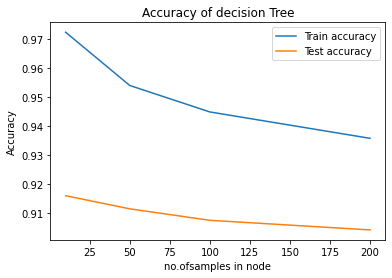

In [10]:
test_accuracy_list=[]
train_accuracy_list=[]
min_samples_split = [10,50,100,200]

for i in min_samples_split:
    regressor=tree.DecisionTreeClassifier(min_samples_split=i)
    model=regressor.fit(X_train_counts,train_y)
    test_predict=regressor.predict(X_test_counts)
    train_predict=regressor.predict(X_train_counts)
    accu=metrics.accuracy_score(test_predict,test_y)
    test_accuracy_list.append(accu)
    accu=metrics.accuracy_score(train_predict,train_y)
    train_accuracy_list.append(accu)
    
def plot_accuracy(test_accuracy_list,train_accuracy_list,nodes, xlabel, ylabel,title):
     plt.plot(nodes, train_accuracy_list,label="Train accuracy") 
     plt.plot(nodes, test_accuracy_list,label="Test accuracy") 
     plt.xlabel(xlabel) 
     plt.ylabel(ylabel)  
     plt.title(title) 
     plt.legend()
     plt.show() 
    
    
plot_accuracy(test_accuracy_list,train_accuracy_list,min_samples_split, "no.ofsamples in node", "Accuracy", "Accuracy of decision Tree")

#### b. Maximum number of leaf nodes in the tree

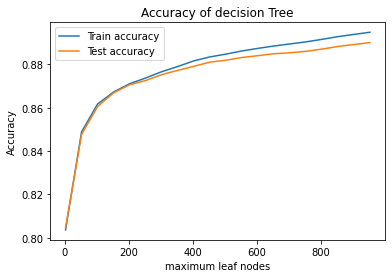

In [11]:
test_accuracy_list=[]
train_accuracy_list=[]
max_leaf_nodes=1000
max_leaves=[]
step_size_2=50
for i in range(2, max_leaf_nodes,step_size_2):
    max_leaves.append(i)
    regressor=tree.DecisionTreeClassifier(max_leaf_nodes=i)
    model=regressor.fit(X_train_counts,train_y)
    test_predict=regressor.predict(X_test_counts)
    train_predict=regressor.predict(X_train_counts)
    accu=metrics.accuracy_score(test_predict,test_y)
    test_accuracy_list.append(accu)
    accu=metrics.accuracy_score(train_predict,train_y)
    train_accuracy_list.append(accu)

plot_accuracy(test_accuracy_list,train_accuracy_list,max_leaves, "maximum leaf nodes", "Accuracy", "Accuracy of decision Tree")

#### c. Splitting criteria(Gini Vs Entropy)

In [12]:
from sklearn import tree
import time
start = time.process_time()
regressor=tree.DecisionTreeClassifier(criterion='entropy')  
model=regressor.fit(X_train_counts,train_y) 
y_predict=regressor.predict(X_test_counts)
accu=metrics.accuracy_score(y_predict,test_y)
time1=time.process_time() - start
start = time.process_time()
regressor1=tree.DecisionTreeClassifier()
model1=regressor1.fit(X_train_counts,train_y)
y_predict1=regressor1.predict(X_test_counts)
accu1=metrics.accuracy_score(y_predict1,test_y)
time2 = time.process_time()-start
print("Accuracy when split criteria is gini ",accu1,"and the time taken is",time2,"ms")
print("Accuracy when split criteria is entropy ",accu,"and the time taken is",time1,"ms")

Accuracy when split criteria is gini  0.9133090335927495 and the time taken is 243.375 ms
Accuracy when split criteria is entropy  0.9150259650702957 and the time taken is 251.40625 ms


#### d. depth of the decision tree [5 pts]
The impact of depth of the decision tree on the test accuracy

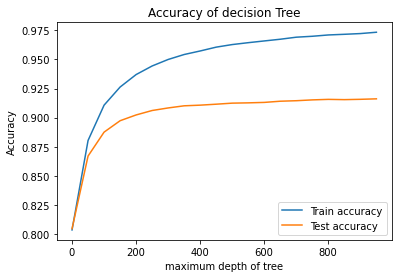

In [13]:
from sklearn import tree
test_accuracy_list=[]
train_accuracy_list=[]
maximum_depth=1000
max_dep=[]
step_size=50
for i in range(1, maximum_depth,step_size):
    max_dep.append(i)
    regressor=tree.DecisionTreeClassifier(max_depth=i)
    model=regressor.fit(X_train_counts,train_y)
    test_predict=regressor.predict(X_test_counts)
    train_predict=regressor.predict(X_train_counts)
    accu=metrics.accuracy_score(test_predict,test_y)
    test_accuracy_list.append(accu)
    accu=metrics.accuracy_score(train_predict,train_y)
    train_accuracy_list.append(accu)

plot_accuracy(test_accuracy_list,train_accuracy_list,max_dep, "maximum depth of tree", "Accuracy", "Accuracy of decision Tree")

### 7. Random forest
Now, let us explore an ensemble of decision trees - random forest. Let us learn a random forest using both instance and feature bagging independently.
#### A. Instance bagging [10 pts]
Instances are sampled with replacement to create multiple synthetic training sets. Decision tree is learned for every training set. An ensemble strategy (majority voting) is applied on the output of all the trees for a test instance. Let us vary the number of instances in each bag to learn the random forest and check if there is impact on the performance of the ensemble. 

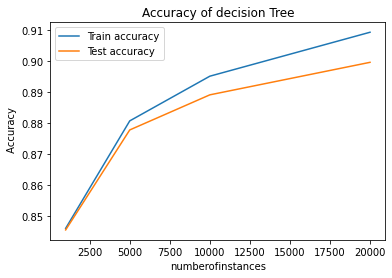

In [14]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
import random
test_accuracy_list=[]
train_accuracy_list=[]
number_of_instances = [1000,5000,10000,20000]
for i in number_of_instances:
    regressor=RandomForestClassifier(max_samples=i,n_jobs=-1)
    model=regressor.fit(X_train_counts,train_y)
    test_predict=regressor.predict(X_test_counts)
    train_predict=regressor.predict(X_train_counts)
    accu=metrics.accuracy_score(test_predict,test_y)
    test_accuracy_list.append(accu)
    accu=metrics.accuracy_score(train_predict,train_y)
    train_accuracy_list.append(accu)

plot_accuracy(test_accuracy_list,train_accuracy_list,number_of_instances, "numberofinstances"," Accuracy", "Accuracy of decision Tree")

#### B. Feature bagging
For performing feature bagging, we sample a subset of features from the initial set of features. A decision tree is learned for every training set that contains all the instances characterized by a subset of features. An ensemble strategy is applied for classifying a test instance. In this experiment we will investigate the impact of varying the number of features bagged on the test accuracy.

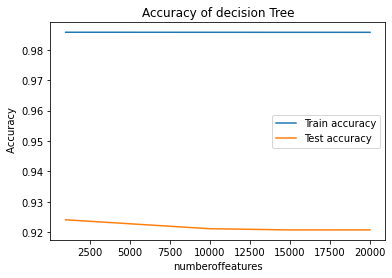

In [15]:
from sklearn.ensemble import RandomForestClassifier
test_accuracy_list=[]
train_accuracy_list=[]
number_of_features = [1000,10000,15000,20000]
for i in number_of_features:
    regressor=RandomForestClassifier(max_features=i)
    model=regressor.fit(X_train_counts,train_y)
    test_predict=regressor.predict(X_test_counts)
    train_predict=regressor.predict(X_train_counts)
    accu=metrics.accuracy_score(test_predict,test_y)
    test_accuracy_list.append(accu)
    accu=metrics.accuracy_score(train_predict,train_y)
    train_accuracy_list.append(accu)


plot_accuracy(test_accuracy_list,train_accuracy_list,number_of_features, "numberoffeatures"," Accuracy", "Accuracy of decision Tree")


#### C. Number of trees in the forest 
Finally let us vary the number of trees in the random forest. We will use the default random forest classifier and only vary the number of trees learned in the ensemble. Again make your observations on the test accuracy as the number of trees are varied.

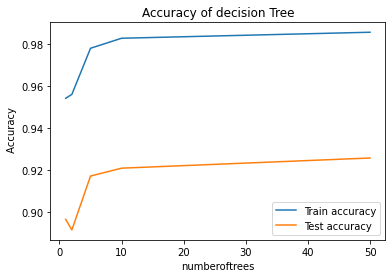

In [16]:
from sklearn.ensemble import RandomForestClassifier
test_accuracy_list=[]
train_accuracy_list=[]
number_of_trees = [1,2,5,10,50]
for i in number_of_trees:
    regressor=RandomForestClassifier(n_estimators=i)
    model=regressor.fit(X_train_counts,train_y)
    test_predict=regressor.predict(X_test_counts)
    train_predict=regressor.predict(X_train_counts)
    accu=metrics.accuracy_score(test_predict,test_y)
    test_accuracy_list.append(accu)
    accu=metrics.accuracy_score(train_predict,train_y)
    train_accuracy_list.append(accu)

plot_accuracy(test_accuracy_list,train_accuracy_list,number_of_trees, "numberoftrees"," Accuracy", "Accuracy of decision Tree")